In [4]:
# https://blog.qoda.com.br/data-science-em-sua-conta-netflix/
# https://nbviewer.jupyter.org/gist/qodatecnologia/8a4e655b3da8ec285228f8144f80c069

import pandas as pd
df = pd.read_csv('C:/Users/mawri/Downloads/ViewingActivity-sample.csv')


In [7]:
df.shape

(200, 3)

In [8]:
df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


In [10]:
df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


In [12]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [13]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

In [14]:
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [15]:
# muda a coluna Start Time para o índice do dataframe
df = df.set_index('Start Time')

In [20]:
# converte UTC para America/Sao_Paulo
df.index = df.index.tz_convert('America/Sao_Paulo')

AttributeError: 'RangeIndex' object has no attribute 'tz_convert'

In [21]:
# Resetamos o index e Startime volta a ser uma simples colina
df = df.reset_index()

In [22]:
# analisar se está tudo ok com df.head
df.head()

,index,Start Time,Duration,Title
0,0,2013-03-20 02:17:53-03:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,1,2013-03-20 01:27:45-03:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2,2013-03-20 01:05:21-03:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,3,2013-03-19 21:20:03-03:00,0:48:14,The Invisible War
4,4,2013-03-19 21:10:31-03:00,0:04:51,The Invisible War


In [23]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

index                                     int64
Start Time    datetime64[ns, America/Sao_Paulo]
Duration                        timedelta64[ns]
Title                                    object
dtype: object

In [24]:
# Novo dataframe apenas com aparições de THE OFFICE
office = df.loc[df['Title'].str.contains('The Office (U.S.)', na=False, regex=False)]
office.sample(20)

,index,Start Time,Duration,Title
114,114,2013-03-11 02:50:07-03:00,00:18:16,The Office (U.S.): Season 2: The Fire (Episode 4)
68,68,2013-03-13 19:56:08-03:00,00:21:06,The Office (U.S.): Season 3: Traveling Salesme...
144,144,2013-03-09 05:25:52-03:00,00:09:24,The Office (U.S.): Season 7: China (Episode 10)
148,148,2013-03-09 03:44:33-03:00,00:21:45,The Office (U.S.): Season 7: Costume Contest (...
72,72,2013-03-13 14:30:04-03:00,00:11:05,The Office (U.S.): Season 3: A Benihana Christ...
96,96,2013-03-12 00:28:56-03:00,00:21:06,The Office (U.S.): Season 2: Boys and Girls (E...
123,123,2013-03-10 18:46:45-03:00,00:21:32,The Office (U.S.): Season 1: Health Care (Epis...
84,84,2013-03-12 18:18:15-03:00,00:10:31,The Office (U.S.): Season 3: The Coup (Episode 3)
74,74,2013-03-13 02:55:54-03:00,00:21:08,The Office (U.S.): Season 3: The Convict (Epis...
14,14,2013-03-18 17:29:22-03:00,00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...


In [25]:
office.shape

(137, 4)

In [26]:
office = office[(office['Duration'] > '0 days 00:01:00')]

In [27]:
office.shape

(130, 4)

In [28]:
office.sample()

,index,Start Time,Duration,Title
146,146,2013-03-09 04:20:39-03:00,00:21:31,The Office (U.S.): Season 7: Viewing Party (Ep...


In [29]:
office.head()

,index,Start Time,Duration,Title
10,10,2013-03-18 20:04:22-03:00,00:21:07,The Office (U.S.): Season 5: Moroccan Christma...
11,11,2013-03-18 19:42:50-03:00,00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...
12,12,2013-03-18 19:21:52-03:00,00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...
14,14,2013-03-18 17:29:22-03:00,00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...
15,15,2013-03-18 17:07:57-03:00,00:21:21,The Office (U.S.): Season 5: Customer Survey (...


In [30]:
office['Duration'].sum()

Timedelta('1 days 14:57:28')

In [31]:
office['weekday'] = office['Start Time'].dt.weekday


In [32]:
office['hour'] = office['Start Time'].dt.hour


In [33]:
office.head()

,index,Start Time,Duration,Title,weekday,hour
10,10,2013-03-18 20:04:22-03:00,00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,20
11,11,2013-03-18 19:42:50-03:00,00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,0,19
12,12,2013-03-18 19:21:52-03:00,00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,0,19
14,14,2013-03-18 17:29:22-03:00,00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...,0,17
15,15,2013-03-18 17:07:57-03:00,00:21:21,The Office (U.S.): Season 5: Customer Survey (...,0,17


In [40]:
%matplotlib inline
import matplotlib

In [41]:
# definir nossa categoria e definir a ordem para que os dias sejam traçados de segunda a domingo
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

In [42]:
# criar "office_by_day" e contar as linhas para cada dia da semana, atribuindo o resultado a essa variável
office_by_day = office['weekday'].value_counts()

In [43]:
# classificar o índice usando nossas categorias, de modo que segunda-feira (0) seja o primeiro, terça-feira (1) seja o segundo...
office_by_day = office_by_day.sort_index()

In [44]:
# Aumentamos a fonte
matplotlib.rcParams.update({'font.size': 22})

<AxesSubplot:title={'center':'THE OFFICE: Episódios assistidos por dia'}>

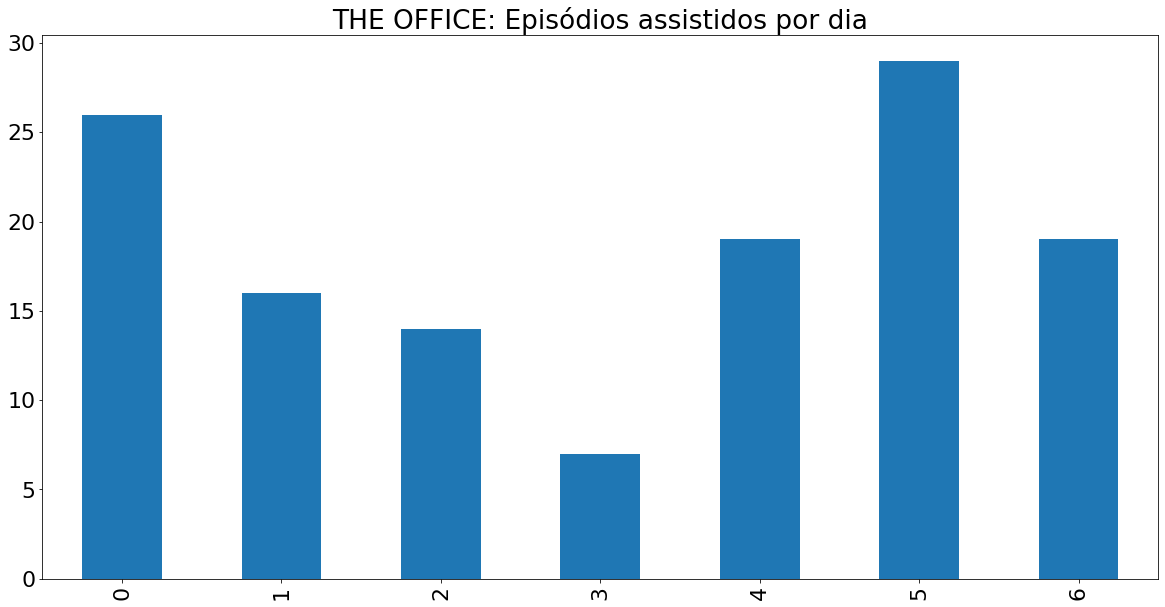

In [45]:
# plotar "office_by_day" como um gráfico de barras com o tamanho e o título listados
office_by_day.plot(kind='bar', figsize=(20,10), title='THE OFFICE: Episódios assistidos por dia')

In [46]:
# definimos nossa categoria e definimos a ordem para que as horas sejam plotadas 0-23

office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)


In [47]:
# criamos "office_by_hour" e contamos as linhas para cada hora, atribuindo o resultado a essa variável
office_by_hour = office['hour'].value_counts()

In [48]:
# classificamos o índice usando nossa categoria, de forma que meia-noite (0) seja a primeira, 1h (1) seja a segunda...
office_by_hour = office_by_hour.sort_index()

<AxesSubplot:title={'center':'THE OFFICE: episódios assistidos por hora'}>

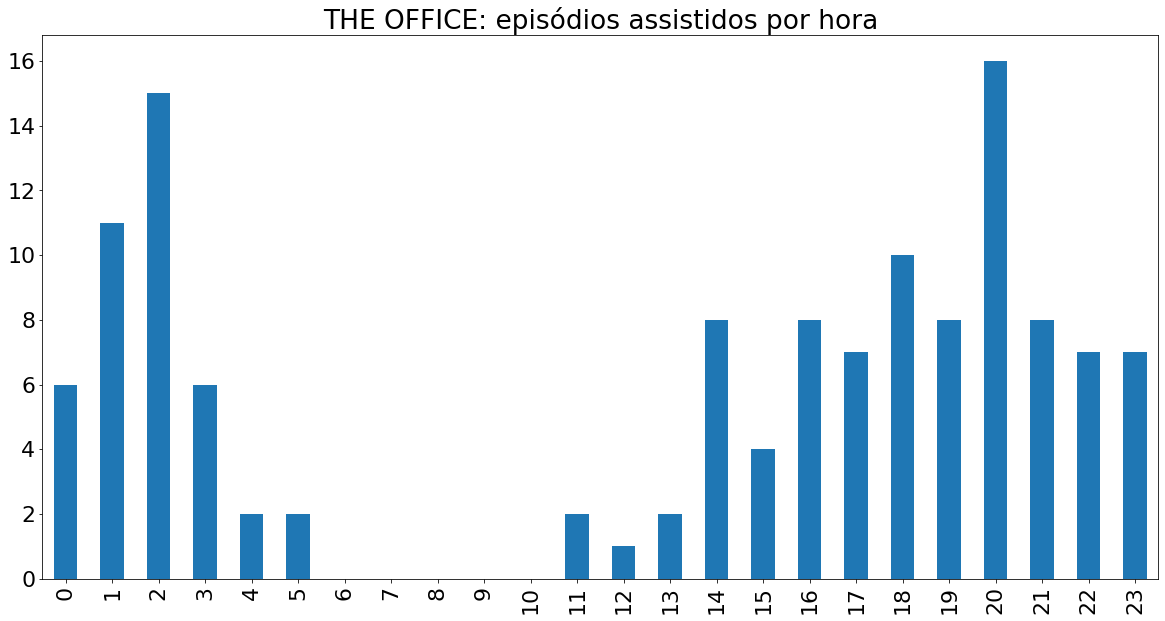

In [49]:
# plotamos "office_by_hour" como um gráfico de barras com o tamanho e título listados
office_by_hour.plot(kind='bar', figsize=(20,10), title='THE OFFICE: episódios assistidos por hora')

In [ ]:
This website does not host notebooks, it only renders notebooks available on other websites.

Delivered by Fastly, Rendered by OVHcloud

nbviewer GitHub repository.

nbviewer version: 90c61cc

nbconvert version: 5.6.1

Rendered a minute ago